## Pandas and SQL - Data Manipulation(Python)

The following ERD shows the design of The database. This is a simplified version of the very popular "Northwind Traders" database.

<img src = "Northwind2020_ERD.png" style=width:500px;/>

    

In [1]:
#import needed libraries
import sqlite3;
import pandas as pd;
#pandas is similar and uses a lot of the same coding ideoms as NumPy, but it is is the better suited library for data which is categorised data. i.e data we can expect to look similar like tabulated or binary data.
#Connect to the database and instantiate cursor
conn = sqlite3.connect('Northwind2020.db')
cursor = conn.cursor()
print("Opened database successfully")


Opened database successfully


#                                                                       1. Sales Performance Analysis

## --> Top 10 Best-Selling Products <--


### Shows which products contribute most to sales volume.

In [2]:
Top_10 =""" SELECT  
           p.ProductName,
           SUM(oi.Quantity) AS TotalSold 
FROM Product p
JOIN OrderItem oi ON p.Id = oi.ProductId
GROUP BY p.ProductName
ORDER BY TotalSold DESC
LIMIT 10;"""

# Run the query
result = pd.read_sql_query(Top_10, conn)

# Show the result
print(result)




              ProductName  TotalSold
0       Camembert Pierrot       1577
1    Raclette Courdavault       1496
2       Gorgonzola Telino       1397
3  Gnocchi di nonna Alice       1263
4                 Pavlova       1158
5    Rhönbräu Klosterbier       1155
6      Guaraná Fantástica       1125
7        Boston Crab Meat       1103
8          Tarte au sucre       1083
9             Flotemysost       1057


## --> Revenue Trend <--

### Analyzes revenue growth or decline over time.

In [3]:
M_trend="""SELECT
    ROUND(SUM(oi.UnitPrice * oi.Quantity), 2) AS Revenue
FROM "Order" o
JOIN OrderItem oi ON o.Id = oi.OrderId;"""


# Run the query
result = pd.read_sql_query(M_trend, conn)

# Show the result
print(result)



      Revenue
0  1354458.59


## --> Total Sales by Country <--

### Finds which countries generate the most revenue

In [4]:
Total_SC="""SELECT c.Country,
           ROUND(SUM(oi.UnitPrice * oi.Quantity), 2) AS Total_Revenue
FROM Customer c
JOIN "Order" o ON c.Id = o.CustomerId
JOIN OrderItem oi ON o.Id = oi.OrderId
GROUP BY c.Country
ORDER BY Total_Revenue DESC;"""


# Run the query
result = pd.read_sql_query(Total_SC, conn)

# Show the result
print(result)

        Country  Total_Revenue
0           USA      263566.98
1       Germany      244640.63
2       Austria      139496.63
3        Brazil      114968.48
4        France       85498.76
5     Venezuela       60814.89
6            UK       60616.51
7        Sweden       59523.70
8       Ireland       57317.39
9        Canada       55334.10
10      Belgium       35134.98
11      Denmark       34782.25
12  Switzerland       32919.50
13       Mexico       24073.45
14      Finland       19778.45
15        Spain       19431.89
16        Italy       16705.15
17     Portugal       12468.65
18    Argentina        8119.10
19       Norway        5735.15
20       Poland        3531.95


# 2. Customer Behavior

## --> Top 5 Customers by Spending <--

### Identifies most valuable customers.

In [5]:
Top_Customers="""SELECT 
                c.FirstName || ' ' || c.LastName AS Customer_Name,
                ROUND(SUM(oi.UnitPrice * oi.Quantity), 2) AS Total_Spent
FROM Customer c
JOIN "Order" o ON c.Id = o.CustomerId
JOIN OrderItem oi ON o.Id = oi.OrderId
GROUP BY Customer_Name
ORDER BY Total_Spent DESC
LIMIT 5;
"""


# Run the query
result = pd.read_sql_query(Top_Customers, conn)

# Show the result
print(result)

      Customer_Name  Total_Spent
0       Horst Kloss    117483.39
1    Jose Pavarotti    115673.39
2     Roland Mendel    113236.68
3  Patricia McKenna     57317.39
4      Paula Wilson     52245.90


## --> Customer Order Frequency <--

### Shows how often customers order (loyalty analysis)

In [6]:
loyalty_Customers="""SELECT 
    c.FirstName || ' ' || c.LastName AS Customer,
    COUNT(o.Id) AS Orders_Placed
FROM Customer c
LEFT JOIN "Order" o ON c.Id = o.CustomerId
GROUP BY Customer
ORDER BY Orders_Placed DESC
LIMIT 10;"""


# Run the query
result = pd.read_sql_query(loyalty_Customers, conn)

# Show the result
print(result)

             Customer  Orders_Placed
0      Jose Pavarotti             31
1       Roland Mendel             30
2         Horst Kloss             28
3    Patricia McKenna             19
4       Maria Larsson             19
5        Paula Wilson             18
6  Christina Berglund             18
7    Carlos Hernández             18
8    Laurence Lebihan             17
9      Renate Messner             15


# 3. Inventory & Supplier Insights

## Least Ordered Products

In [7]:
Least_Ordered="""SELECT 
    p.ProductName,
    COALESCE(SUM(oi.Quantity), 0) AS Total_Quantity
FROM Product p
LEFT JOIN OrderItem oi ON p.Id = oi.ProductId
GROUP BY p.ProductName
ORDER BY Total_Quantity ASC
LIMIT 5;
"""


# Run the query
result = pd.read_sql_query(Least_Ordered, conn)

# Show the result
print(result)

       ProductName  Total_Quantity
0     Stroopwafels               0
1  Mishi Kobe Niku              95
2     Genen Shouyu             122
3       Gravad lax             125
4        Chocolade             138


## Suppliers with Most Products

In [8]:
Most_Products="""SELECT 
    s.CompanyName,
    COUNT(p.Id) AS Number_Of_Products
FROM Supplier s
JOIN Product p ON s.Id = p.SupplierId
GROUP BY s.CompanyName
ORDER BY Number_Of_Products DESC;"""


# Run the query
result = pd.read_sql_query(Most_Products, conn)

# Show the result
print(result)


                               CompanyName  Number_Of_Products
0        Plutzer Lebensmittelgroßmärkte AG                   5
1                            Pavlova, Ltd.                   5
2                 Specialty Biscuits, Ltd.                   4
3               New Orleans Cajun Delights                   4
4                      Zaanse Snoepfabriek                   3
5                            Tokyo Traders                   3
6                        Svensk Sjöföda AB                   3
7                          Norske Meierier                   3
8                                 Mayumi's                   3
9                             Leka Trading                   3
10                               Karkki Oy                   3
11             Heli Süßwaren GmbH & Co. KG                   3
12               Grandma Kelly's Homestead                   3
13                             G'day, Mate                   3
14                 Formaggi Fortini s.r.l.             

## Discontinued Products

In [9]:
D_P="""SELECT 
    ProductName,
    IsDiscontinued
    FROM Product
    WHERE IsDiscontinued = 1;"""
result = pd.read_sql_query(D_P, conn)   
print(result)

                     ProductName  IsDiscontinued
0         Chef Anton's Gumbo Mix               1
1                Mishi Kobe Niku               1
2                   Alice Mutton               1
3             Guaraná Fantástica               1
4              Rössle Sauerkraut               1
5        Thüringer Rostbratwurst               1
6  Singaporean Hokkien Fried Mee               1
7                  Perth Pasties               1


# 4. Profitability & Pricing

## --> Average Selling Price per Product <--


In [10]:
A_S_P="""SELECT 
       p.ProductName,
       ROUND(AVG(oi.UnitPrice), 2) AS Avg_Selling_Price
       FROM Product p
       JOIN OrderItem oi ON p.Id = oi.ProductId
       GROUP BY p.ProductName;
"""
result = pd.read_sql_query(A_S_P, conn)   
print(result)

                        ProductName  Avg_Selling_Price
0                      Alice Mutton              36.47
1                     Aniseed Syrup               9.50
2                  Boston Crab Meat              17.23
3                 Camembert Pierrot              32.13
4                  Carnarvon Tigers              59.72
..                              ...                ...
72  Uncle Bob's Organic Dried Pears              29.17
73                 Valkoinen suklaa              14.95
74                     Vegie-spread              40.79
75        Wimmers gute Semmelknödel              31.03
76                    Zaanse koeken               9.14

[77 rows x 2 columns]


## --> Total Revenue per Supplier <--

In [11]:
T_R_PS="""SELECT 
    s.CompanyName,
    ROUND(SUM(oi.UnitPrice * oi.Quantity), 2) AS Supplier_Revenue
FROM Supplier s
JOIN Product p ON s.Id = p.SupplierId
JOIN OrderItem oi ON p.Id = oi.ProductId
GROUP BY s.CompanyName
ORDER BY Supplier_Revenue DESC;
"""
result = pd.read_sql_query(T_R_PS, conn)   
print(result)

                               CompanyName  Supplier_Revenue
0               Aux joyeux ecclésiastiques         163135.00
1        Plutzer Lebensmittelgroßmärkte AG         155946.55
2                             Gai pâturage         126582.00
3                            Pavlova, Ltd.         115386.05
4                              G'day, Mate          69636.60
5                         Forêts d'érables          66266.70
6                     Pasta Buttini s.r.l.          52929.00
7                  Formaggi Fortini s.r.l.          51082.50
8                 Specialty Biscuits, Ltd.          48793.80
9                          Norske Meierier          46897.20
10                            Leka Trading          44935.80
11               Grandma Kelly's Homestead          43569.00
12             Heli Süßwaren GmbH & Co. KG          40818.00
13                          Exotic Liquids          35916.80
14                           Tokyo Traders          33533.20
15              New Orle

# 5. Operational Insights

## --> Top Customers by Average Order Value (AOV) <--

In [12]:
AOV="""SELECT 
    c.FirstName || ' ' || c.LastName AS Customer,
    ROUND(AVG(o.TotalAmount), 2) AS AvgOrderValue
FROM Customer c
JOIN "Order" o ON c.Id = o.CustomerId
GROUP BY c.Id
ORDER BY AvgOrderValue DESC
LIMIT 5;"""
result = pd.read_sql_query( AOV, conn)
print(result)

           Customer  AvgOrderValue
0       Horst Kloss        4195.84
1     Roland Mendel        3774.56
2    Jose Pavarotti        3731.40
3  Patricia McKenna        3016.70
4      Paula Wilson        2902.55


## --> Most Frequently Ordered Product per Country <--

In [13]:
F_PC="""SELECT 
    c.Country,
    p.ProductName,
    SUM(oi.Quantity) AS QuantityOrdered
FROM Customer c
JOIN "Order" o ON c.Id = o.CustomerId
JOIN OrderItem oi ON o.Id = oi.OrderId
JOIN Product p ON oi.ProductId = p.Id
GROUP BY c.Country, p.ProductName
ORDER BY c.Country, QuantityOrdered DESC;"""
result = pd.read_sql_query( F_PC, conn)
print(result)

       Country                      ProductName  QuantityOrdered
0    Argentina                   Queso Cabrales               30
1    Argentina           Sir Rodney's Marmalade               20
2    Argentina                    Sasquatch Ale               20
3    Argentina             Rhönbräu Klosterbier               20
4    Argentina                   Ravioli Angelo               20
..         ...                              ...              ...
931  Venezuela                     Genen Shouyu               20
932  Venezuela                         Filo Mix               20
933  Venezuela  Uncle Bob's Organic Dried Pears               15
934  Venezuela          Thüringer Rostbratwurst               10
935  Venezuela                     Gula Malacca               10

[936 rows x 3 columns]


In [14]:

UserInput = input("Select Customer for order report: ")
SQL = '''SELECT FirstName, LastName, OrderNumber, TotalAmount, ProductName, OI.UnitPrice, Quantity
        FROM Customer as C,Product as P, [Order] as O,OrderItem as OI
         WHERE O.Id = OI.OrderId
         AND C.Id = O.CustomerId
         AND P.Id = OI.ProductId
         AND C.Id = ?'''
DF= pd.read_sql_query(SQL, conn, params = (UserInput,))
DF


,FirstName,LastName,OrderNumber,TotalAmount,ProductName,UnitPrice,Quantity
0,Jaime,Yorres,542709,317.75,Genen Shouyu,15.50,10
1,Jaime,Yorres,542709,317.75,Rhönbräu Klosterbier,7.75,21
2,Jaime,Yorres,542849,1125.67,Carnarvon Tigers,62.50,12
3,Jaime,Yorres,542849,1125.67,Nord-Ost Matjeshering,25.89,3
4,Jaime,Yorres,542849,1125.67,Tourtière,7.45,40
5,Jaime,Yorres,542865,596.00,Sirop d'érable,28.50,20
6,Jaime,Yorres,542865,596.00,Original Frankfurter grüne Soße,13.00,2
7,Jaime,Yorres,543014,1450.60,Sir Rodney's Scones,10.00,40
8,Jaime,Yorres,543014,1450.60,Gnocchi di nonna Alice,38.00,21
9,Jaime,Yorres,543014,1450.60,Louisiana Fiery Hot Pepper Sauce,21.05,12


In [15]:
cursor = conn.cursor()
for row in cursor.execute( '''SELECT sql FROM sqlite_master WHERE type = "table"''' ):
    print(row)
cursor.close()

('CREATE TABLE Customer \n   (Id                   INTEGER PRIMARY KEY,\n   FirstName            TEXT    NOT NULL,\n   LastName             TEXT    NOT NULL,\n   City                 TEXT,\n   Country              TEXT,\n   Phone                TEXT)',)
('CREATE TABLE Supplier (\n   Id                   INTEGER PRIMARY KEY,\n   CompanyName          TEXT    NOT NULL,\n   ContactName          TEXT,\n   ContactTitle         TEXT,\n   City                 TEXT,\n   Country              TEXT,\n   Phone                TEXT,\n   Fax                  TEXT)',)
('CREATE TABLE Product (\n   Id                   INTEGER PRIMARY KEY,\n   ProductName          TEXT    NOT NULL,\n   SupplierId           INTEGER NOT NULL,\n   UnitPrice            REAL NOT NULL DEFAULT 0,\n   Package              TEXT,\n   IsDiscontinued       INTEGER NOT NULL DEFAULT 0,\n   FOREIGN KEY (SupplierId)\n    REFERENCES Supplier (Id))',)
('CREATE TABLE "Order" (\n   Id                   INTEGER PRIMARY KEY,\n   OrderDate    

In [16]:
cursor = conn.cursor()
cursor.execute( "PRAGMA table_info('Supplier')" )
names = [ x[0] for x in cursor.description]
rows = cursor.fetchall()
df = pd.DataFrame( rows, columns=names)
df

,cid,name,type,notnull,dflt_value,pk
0,0,Id,INTEGER,0,None,1
1,1,CompanyName,TEXT,1,None,0
2,2,ContactName,TEXT,0,None,0
3,3,ContactTitle,TEXT,0,None,0
4,4,City,TEXT,0,None,0
5,5,Country,TEXT,0,None,0
6,6,Phone,TEXT,0,None,0
7,7,Fax,TEXT,0,None,0


## Task

# Determine what types of data are stored in each column of the dataframe.


In [17]:
print(DF.dtypes)

FirstName       object
LastName        object
OrderNumber     object
TotalAmount    float64
ProductName     object
UnitPrice      float64
Quantity         int64
dtype: object


In [18]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FirstName    10 non-null     object 
 1   LastName     10 non-null     object 
 2   OrderNumber  10 non-null     object 
 3   TotalAmount  10 non-null     float64
 4   ProductName  10 non-null     object 
 5   UnitPrice    10 non-null     float64
 6   Quantity     10 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 692.0+ bytes


# Determine how many rows there are in the dataframe: 


In [19]:
num_rows = DF.shape[0]

print(f"The DataFrame has {num_rows} rows.")

The DataFrame has 10 rows.


# Check to see whether the user of your choice has ever bought coffee, pavlova or hot pepper sauce. Print appropriate messages if they have or have not been purchased.

In [20]:
if'Pavlova' in DF['ProductName'].values:
    print('Yes he drank coffe Pavlova')
else:
    print("No he didi not drink ")


No he didi not drink 


In [21]:
if'Hot pepper sauce' in DF['ProductName'].values:
    print('Yes he drank coffe Pavlova')
else:
    print("No he didi not drink ")

No he didi not drink 


# Count how many order lines included the purchases of Nord-Ost Matjeshering or  Carnarvon Tigers. Display a tally of each.

In [22]:
OrderNordOstdf= DF['ProductName'].value_counts()
OrderNordOstdf

ProductName
Genen Shouyu                        1
Rhönbräu Klosterbier                1
Carnarvon Tigers                    1
Nord-Ost Matjeshering               1
Tourtière                           1
Sirop d'érable                      1
Original Frankfurter grüne Soße     1
Sir Rodney's Scones                 1
Gnocchi di nonna Alice              1
Louisiana Fiery Hot Pepper Sauce    1
Name: count, dtype: int64

In [23]:
product_counts = DF['ProductName'].value_counts()
nordost_count = product_counts.get('Nord-Ost Matjeshering', 0)
carnarvon_count = product_counts.get('Carnarvon Tigers', 0)

print(f"Nord-Ost Matjeshering was purchased in {nordost_count} order lines.")
print(f"Carnarvon Tigers was purchased in {carnarvon_count} order lines.")

Nord-Ost Matjeshering was purchased in 1 order lines.
Carnarvon Tigers was purchased in 1 order lines.


# Display the three products with the least overall orders in terms of quantity.

In [24]:
# Query: least ordered 3 products
least_three_sql = """
SELECT 
    p.Id AS ProductId,
    p.ProductName,
    COALESCE(SUM(oi.Quantity), 0) AS Total_Quantity_Ordered
FROM Product AS p
LEFT JOIN OrderItem AS oi
    ON p.Id = oi.ProductId
GROUP BY p.Id, p.ProductName
ORDER BY Total_Quantity_Ordered ASC
LIMIT 3;
"""

least_three = pd.read_sql_query(least_three_sql, conn)


print(least_three)

   ProductId      ProductName  Total_Quantity_Ordered
0         78     Stroopwafels                       0
1          9  Mishi Kobe Niku                      95
2         15     Genen Shouyu                     122


# Display all orderlines that had a unit price of less that 22.00 and a Total cost of more than 260.00.

In [25]:
DF['TotalCost'] = DF['UnitPrice'] * DF['Quantity']

filtered_df = DF[(DF['UnitPrice'] < 22) & (DF['TotalCost'] > 260)]

print("Order lines with a unit price of less than 22.00 and a total cost of more than 260.00:")
filtered_df

Order lines with a unit price of less than 22.00 and a total cost of more than 260.00:


,FirstName,LastName,OrderNumber,TotalAmount,ProductName,UnitPrice,Quantity,TotalCost
4,Jaime,Yorres,542849,1125.67,Tourtière,7.45,40,298.0
7,Jaime,Yorres,543014,1450.60,Sir Rodney's Scones,10.00,40,400.0


In [26]:
def color_magic(filtered_df):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if filtered_df < 600:
    color = 'red'
  elif filtered_df > 400:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color


DFnewdf = DF.style.applymap(color_magic, subset = ['TotalCost'])
DFnewdf

C:\Users\alexa\AppData\Local\Temp\ipykernel_34212\985464893.py:19: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  DFnewdf = DF.style.applymap(color_magic, subset = ['TotalCost'])


,FirstName,LastName,OrderNumber,TotalAmount,ProductName,UnitPrice,Quantity,TotalCost
0,Jaime,Yorres,542709,317.750000,Genen Shouyu,15.500000,10,155.000000
1,Jaime,Yorres,542709,317.750000,Rhönbräu Klosterbier,7.750000,21,162.750000
2,Jaime,Yorres,542849,1125.670000,Carnarvon Tigers,62.500000,12,750.000000
3,Jaime,Yorres,542849,1125.670000,Nord-Ost Matjeshering,25.890000,3,77.670000
4,Jaime,Yorres,542849,1125.670000,Tourtière,7.450000,40,298.000000
5,Jaime,Yorres,542865,596.000000,Sirop d'érable,28.500000,20,570.000000
6,Jaime,Yorres,542865,596.000000,Original Frankfurter grüne Soße,13.000000,2,26.000000
7,Jaime,Yorres,543014,1450.600000,Sir Rodney's Scones,10.000000,40,400.000000
8,Jaime,Yorres,543014,1450.600000,Gnocchi di nonna Alice,38.000000,21,798.000000
9,Jaime,Yorres,543014,1450.600000,Louisiana Fiery Hot Pepper Sauce,21.050000,12,252.600000


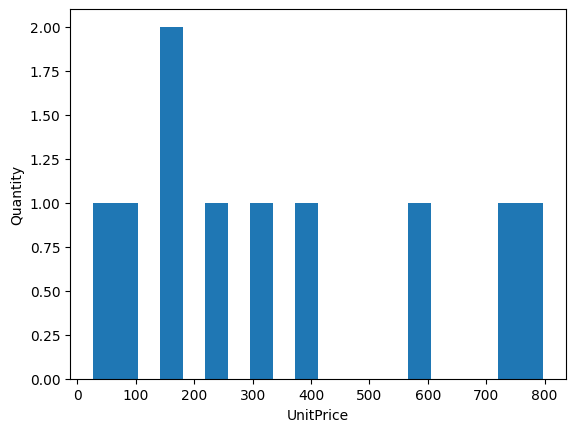

In [27]:
import matplotlib.pyplot as plt

# Create a histogram of the unit prices
plt.hist(DF['TotalCost'], bins=20)
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.show()

## Filtering data with Pandas .query() method
Analyzing data requires a lot of filtering operations. Pandas provide many methods to filter a Data frame and Dataframe.query() is one of them.
~~~~
Syntax: DataFrame.query(expr, inplace=False, **kwargs)
~~~~

Parameters:
expr: Expression in string form to filter data.
inplace: Make changes in the original data frame if True
kwargs: Other keyword arguments.

Return type: Filtered Data frame

Examples will be included in a future lesson.

# Using the .query method to replicate the previos questions result.

# Style all currency columns to include a Currency symbol


In [28]:
filtered_df = DF.head(10).style.format({"UnitPrice": "{:.2f} kr", "TotalCost": "{:.2f} kr"}).hide(axis="index")

filtered_df


FirstName,LastName,OrderNumber,TotalAmount,ProductName,UnitPrice,Quantity,TotalCost
Jaime,Yorres,542709,317.750000,Genen Shouyu,15.50 kr,10,155.00 kr
Jaime,Yorres,542709,317.750000,Rhönbräu Klosterbier,7.75 kr,21,162.75 kr
Jaime,Yorres,542849,1125.670000,Carnarvon Tigers,62.50 kr,12,750.00 kr
Jaime,Yorres,542849,1125.670000,Nord-Ost Matjeshering,25.89 kr,3,77.67 kr
Jaime,Yorres,542849,1125.670000,Tourtière,7.45 kr,40,298.00 kr
Jaime,Yorres,542865,596.000000,Sirop d'érable,28.50 kr,20,570.00 kr
Jaime,Yorres,542865,596.000000,Original Frankfurter grüne Soße,13.00 kr,2,26.00 kr
Jaime,Yorres,543014,1450.600000,Sir Rodney's Scones,10.00 kr,40,400.00 kr
Jaime,Yorres,543014,1450.600000,Gnocchi di nonna Alice,38.00 kr,21,798.00 kr
Jaime,Yorres,543014,1450.600000,Louisiana Fiery Hot Pepper Sauce,21.05 kr,12,252.60 kr


# Highlight the lowest UnitPrices

In [29]:
mindf = (
    filtered_df
    .format({"UnitPrice": "{:.2f} kr", "TotalCost": "{:.2f} kr"})
    .highlight_min(subset=["UnitPrice"], color="red")
    .hide(axis="index")  # hides row index in output
)
mindf


FirstName,LastName,OrderNumber,TotalAmount,ProductName,UnitPrice,Quantity,TotalCost
Jaime,Yorres,542709,317.750000,Genen Shouyu,15.50 kr,10,155.00 kr
Jaime,Yorres,542709,317.750000,Rhönbräu Klosterbier,7.75 kr,21,162.75 kr
Jaime,Yorres,542849,1125.670000,Carnarvon Tigers,62.50 kr,12,750.00 kr
Jaime,Yorres,542849,1125.670000,Nord-Ost Matjeshering,25.89 kr,3,77.67 kr
Jaime,Yorres,542849,1125.670000,Tourtière,7.45 kr,40,298.00 kr
Jaime,Yorres,542865,596.000000,Sirop d'érable,28.50 kr,20,570.00 kr
Jaime,Yorres,542865,596.000000,Original Frankfurter grüne Soße,13.00 kr,2,26.00 kr
Jaime,Yorres,543014,1450.600000,Sir Rodney's Scones,10.00 kr,40,400.00 kr
Jaime,Yorres,543014,1450.600000,Gnocchi di nonna Alice,38.00 kr,21,798.00 kr
Jaime,Yorres,543014,1450.600000,Louisiana Fiery Hot Pepper Sauce,21.05 kr,12,252.60 kr


# Use Applymap() to highlight all messages background of the Total Cost cells on the following conditions:

<ol>
   <li>value >100 Green</li>
<li>value >200 Yellow</li>
<li>value >300 Orange</li>
<li>value >400 Red</li>
<li>value >500 Blue</li>
<li>value >600 Purple</li>
    </ol>

In [30]:
def highlight_total_cost(val):
    if val > 600:
        return 'background-color: purple'
    elif val > 500:
        return 'background-color: blue'
    elif val > 400:
        return 'background-color: red'
    elif val > 300:
        return 'background-color: orange'
    elif val > 200:
        return 'background-color: yellow'
    elif val > 100:
        return 'background-color: green'
    else:
        return ''


# View a display of the full Dataframe (No truncation)

In [31]:
styled_df = DF.style.applymap(highlight_total_cost, subset=['TotalCost'])

styled_df

C:\Users\alexa\AppData\Local\Temp\ipykernel_34212\3866301098.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = DF.style.applymap(highlight_total_cost, subset=['TotalCost'])


,FirstName,LastName,OrderNumber,TotalAmount,ProductName,UnitPrice,Quantity,TotalCost
0,Jaime,Yorres,542709,317.750000,Genen Shouyu,15.500000,10,155.000000
1,Jaime,Yorres,542709,317.750000,Rhönbräu Klosterbier,7.750000,21,162.750000
2,Jaime,Yorres,542849,1125.670000,Carnarvon Tigers,62.500000,12,750.000000
3,Jaime,Yorres,542849,1125.670000,Nord-Ost Matjeshering,25.890000,3,77.670000
4,Jaime,Yorres,542849,1125.670000,Tourtière,7.450000,40,298.000000
5,Jaime,Yorres,542865,596.000000,Sirop d'érable,28.500000,20,570.000000
6,Jaime,Yorres,542865,596.000000,Original Frankfurter grüne Soße,13.000000,2,26.000000
7,Jaime,Yorres,543014,1450.600000,Sir Rodney's Scones,10.000000,40,400.000000
8,Jaime,Yorres,543014,1450.600000,Gnocchi di nonna Alice,38.000000,21,798.000000
9,Jaime,Yorres,543014,1450.600000,Louisiana Fiery Hot Pepper Sauce,21.050000,12,252.600000


# Truncate the view of the Dataframe to 13 rows.


In [32]:
pd.set_option('display.max_rows', 13)
DF

,FirstName,LastName,OrderNumber,TotalAmount,ProductName,UnitPrice,Quantity,TotalCost
0,Jaime,Yorres,542709,317.75,Genen Shouyu,15.50,10,155.00
1,Jaime,Yorres,542709,317.75,Rhönbräu Klosterbier,7.75,21,162.75
2,Jaime,Yorres,542849,1125.67,Carnarvon Tigers,62.50,12,750.00
3,Jaime,Yorres,542849,1125.67,Nord-Ost Matjeshering,25.89,3,77.67
4,Jaime,Yorres,542849,1125.67,Tourtière,7.45,40,298.00
5,Jaime,Yorres,542865,596.00,Sirop d'érable,28.50,20,570.00
6,Jaime,Yorres,542865,596.00,Original Frankfurter grüne Soße,13.00,2,26.00
7,Jaime,Yorres,543014,1450.60,Sir Rodney's Scones,10.00,40,400.00
8,Jaime,Yorres,543014,1450.60,Gnocchi di nonna Alice,38.00,21,798.00
9,Jaime,Yorres,543014,1450.60,Louisiana Fiery Hot Pepper Sauce,21.05,12,252.60


# Reset the view of the Data Frame.

In [33]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
DF

,FirstName,LastName,OrderNumber,TotalAmount,ProductName,UnitPrice,Quantity,TotalCost
0,Jaime,Yorres,542709,317.75,Genen Shouyu,15.50,10,155.00
1,Jaime,Yorres,542709,317.75,Rhönbräu Klosterbier,7.75,21,162.75
2,Jaime,Yorres,542849,1125.67,Carnarvon Tigers,62.50,12,750.00
3,Jaime,Yorres,542849,1125.67,Nord-Ost Matjeshering,25.89,3,77.67
4,Jaime,Yorres,542849,1125.67,Tourtière,7.45,40,298.00
5,Jaime,Yorres,542865,596.00,Sirop d'érable,28.50,20,570.00
6,Jaime,Yorres,542865,596.00,Original Frankfurter grüne Soße,13.00,2,26.00
7,Jaime,Yorres,543014,1450.60,Sir Rodney's Scones,10.00,40,400.00
8,Jaime,Yorres,543014,1450.60,Gnocchi di nonna Alice,38.00,21,798.00
9,Jaime,Yorres,543014,1450.60,Louisiana Fiery Hot Pepper Sauce,21.05,12,252.60


In [34]:
def color_magic(DF):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if DF < 20:
    color = 'red'
  elif DF > 10:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color


DFnewdf = DF.style.applymap(color_magic, subset = ['Quantity'])
DFnewdf

C:\Users\alexa\AppData\Local\Temp\ipykernel_34212\2005309930.py:19: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  DFnewdf = DF.style.applymap(color_magic, subset = ['Quantity'])


,FirstName,LastName,OrderNumber,TotalAmount,ProductName,UnitPrice,Quantity,TotalCost
0,Jaime,Yorres,542709,317.750000,Genen Shouyu,15.500000,10,155.000000
1,Jaime,Yorres,542709,317.750000,Rhönbräu Klosterbier,7.750000,21,162.750000
2,Jaime,Yorres,542849,1125.670000,Carnarvon Tigers,62.500000,12,750.000000
3,Jaime,Yorres,542849,1125.670000,Nord-Ost Matjeshering,25.890000,3,77.670000
4,Jaime,Yorres,542849,1125.670000,Tourtière,7.450000,40,298.000000
5,Jaime,Yorres,542865,596.000000,Sirop d'érable,28.500000,20,570.000000
6,Jaime,Yorres,542865,596.000000,Original Frankfurter grüne Soße,13.000000,2,26.000000
7,Jaime,Yorres,543014,1450.600000,Sir Rodney's Scones,10.000000,40,400.000000
8,Jaime,Yorres,543014,1450.600000,Gnocchi di nonna Alice,38.000000,21,798.000000
9,Jaime,Yorres,543014,1450.600000,Louisiana Fiery Hot Pepper Sauce,21.050000,12,252.600000
